# Auto Insurance Fraud 



### Summary of the project<br>

In this project we analize a classic inbalance situation in insurance scenario. 

Each line represents a specific insurer with all his personal data/predictors (months as customer, age, total claim amount, property claim, ... ) and we want to predict if he defrauds/ doesn't defraud and the associated probability.

It is divided in this way:<br>

1. Importing phase<br>
    1.1 Library<br>
    1.2 Data (from Kaggle API)<br>
2. EDA and Preprocessing<br>
    2.1 Identify null values<br>
    2.2 Basic statistics<br>
    2.3 Features selection<br>
    2.4 Exploratory Data Analysis<br>
    2.5 Encoding data for modelling <br>
3. Predictive models<br>
    3.1 Features ,Target and Scaling<br>
    3.2 Modelling and performance<br>
    3.3 ROC curve, P-R curve, Auc_score, Confusion Matrix
4. Conclusion

## 1 Importing phase:

### 1.1 Importing library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder #to convert qualitative vars in the right way
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt #to plot data
import seaborn as sns#as above
%matplotlib inline #memorize the graph in the notebook file

UsageError: unrecognized arguments: #memorize the graph in the notebook file


In [2]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.model_selection import train_test_split #to split data
from sklearn.metrics import f1_score #f1_score  for classificator
from sklearn.metrics import classification_report #Other metric for classificator
from sklearn.linear_model import LogisticRegression #Logistic regression
from sklearn.tree import DecisionTreeClassifier  #Decision tree
from sklearn.svm import SVC #Support Vector Machine

In [3]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score #specific metric for classificator 
from sklearn.metrics import roc_curve #indicator for classifcator
from sklearn.metrics import precision_recall_curve #Precision and Recall
from sklearn.metrics import auc  #AUC for precision-recall plot
from sklearn.metrics import confusion_matrix #Confusion matrix

In [4]:
#For visualization purpose
import plotly.express as px  
import plotly.graph_objects as go
from matplotlib import pyplot

### 1.2 Importing data from kaggle (API)

We download the data (zip) directly from Kaggle server with (linux) shell commands.<br> This situation is enable with a "!" before shell language

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json  #to fix the warning "Your Kaggle API key is readable by other users on this system..."

In [3]:
! kaggle competitions list  #To check the connection with Kaggle API

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         80           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        172           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        261           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2318           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17573           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4517           False  
connectx

In [4]:
#I download from specific Kaggle server path to a specific local path
! kaggle datasets download -d buntyshah/auto-insurance-claims-data -p /home/nabuz/Visual_Studio_Code/Cool_Stuff_ML_more/Pred_qual_responce/Data_Auto_Insurance --force

  0%|                                               | 0.00/67.4k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 67.4k/67.4k [00:00<00:00, 2.59MB/s]


In [5]:
path = "~/Visual_Studio_Code/Cool_Stuff_ML_more/Pred_qual_responce/Data_Auto_Insurance" #The local path for the folder with data

In [7]:
! unzip {path}/auto-insurance-claims-data.zip -d {path}/  #Unzip the files

Archive:  /home/nabuz/Visual_Studio_Code/Cool_Stuff_ML_more/Pred_qual_responce/Data_Auto_Insurance/auto-insurance-claims-data.zip
  inflating: /home/nabuz/Visual_Studio_Code/Cool_Stuff_ML_more/Pred_qual_responce/Data_Auto_Insurance/insurance_claims.csv  


In [53]:
data = pd.read_csv(path +"/insurance_claims.csv")  #Create a dataframe file (dataset) from a csv

In [54]:
data.head(3) #first 3 lines of our dataset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


In [55]:
data.shape #We have 1000 rows and 40 features (columns)

(1000, 40)

In [56]:
# Dropping column
data.drop('_c39',axis=1,inplace=True) #We drop this colun because have only NULL values

## 2 Exploratory Data analysis and Preprocessing

In this section we plot the data to find insight that are useful for next phases (preprocessing/cleaning ...)

### 2.1 Identifing missing values

In [57]:
#Function to calculate missing values by column
def missing_values_table(df):
    #sum the null value by column
    mis_val = df.isnull().sum()
    #Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df) 
    #Make a table with the results
    mis_val_table = pd.concat([mis_val ,mis_val_percent], axis = 1) 
    #Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0: "Missing values", 1: "% of Total Values"})
    #Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[  
    mis_val_table_ren_columns.iloc[:,1]!=0].sort_values("% of Total Values",         ascending=False).round(1)
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"         "There are " + str(mis_val_table_ren_columns.shape[0]) + 
    " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns



In [58]:
missing_values = missing_values_table(data) #We don't have columns with null values!!

Your selected dataframe has 39 columns.
There are 0 columns that have missing values.


### 2.2 Basic statistics 

In [59]:
data.describe().T #Basic statistics for each column

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


We have different kind of quantitative predictors: 
- Countinuous values. For example claim value (total_claim amount splits into 
  injury_claim,property_claim, vehicle claims...)
- Discrete values. (Age,auto_year,months_as_customer..)<br>

Qualitative variables with 3 or more unique  values (Auto_model,incident_type, 
  auto_make)

### 2.3 Features selection

We want to select the right columns for our predictive models. for this project we use very symple assumption: 
- Among quantitative variable we select variable with no correlation among each 
  other (correlation matrix)
- We delete other variables not based on obvious cause
- We don't select columns where from EDA (plots) there is no relation with  
  responce (Fraud/ No Fraud)

In [60]:
data.dtypes[:15]  #Categorical (qualitative variables) are type "object"

months_as_customer           int64
age                          int64
policy_number                int64
policy_bind_date            object
policy_state                object
policy_csl                  object
policy_deductable            int64
policy_annual_premium      float64
umbrella_limit               int64
insured_zip                  int64
insured_sex                 object
insured_education_level     object
insured_occupation          object
insured_hobbies             object
insured_relationship        object
dtype: object

In [61]:
#Unique values (<=3) for qualitative predictors (columns) 
for col in data.columns:
    if data[col].dtype == 'object'  and len(list(data[col].unique())) <= 3:
        print(col,":",len(list(data[col].unique())),"values:",list(data[col].unique()))
           

policy_state : 3 values: ['OH', 'IN', 'IL']
policy_csl : 3 values: ['250/500', '100/300', '500/1000']
insured_sex : 2 values: ['MALE', 'FEMALE']
property_damage : 3 values: ['YES', '?', 'NO']
police_report_available : 3 values: ['YES', '?', 'NO']
fraud_reported : 2 values: ['Y', 'N']


In [62]:
#I want to delete "?" from property_damage and police_report_available feature so we obtain (['YES','?','NO']) --> (['YES','NO']) 
for col in data.columns:
    if col == "property_damage" or col =="police_report_available":
        print(data[col].value_counts())
#Number of with ? is too high on two predictors. I don't delete the rows!!

?      360
NO     338
YES    302
Name: property_damage, dtype: int64
?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


In [63]:
### Counting values (unique values) for each qualitative column
column_name =[]
unique_value = []

#Iterate through the columns and fill the two list (name of the list and unique values)
for col in data.columns:
    if data[col].dtype == 'object':
        column_name.append(str(col))
        unique_value.append(data[col].nunique())
#Create a dataset and memorize for each column the list
table = pd.DataFrame()
table["Col_name"] = column_name  
table["Value"] = unique_value

table = table.sort_values("Value", ascending=False) #order values by descending order
table

,Col_name,Value
15,incident_location,1000
0,policy_bind_date,951
8,incident_date,60
19,auto_model,39
6,insured_hobbies,20
18,auto_make,14
5,insured_occupation,14
4,insured_education_level,7
14,incident_city,7
13,incident_state,7


In [20]:
#Dropping the columns based on frequency of unique values
#I consider qualitative columns with unique values <=7
#data.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True) #policy_number is a number

In [64]:
data[:3]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N


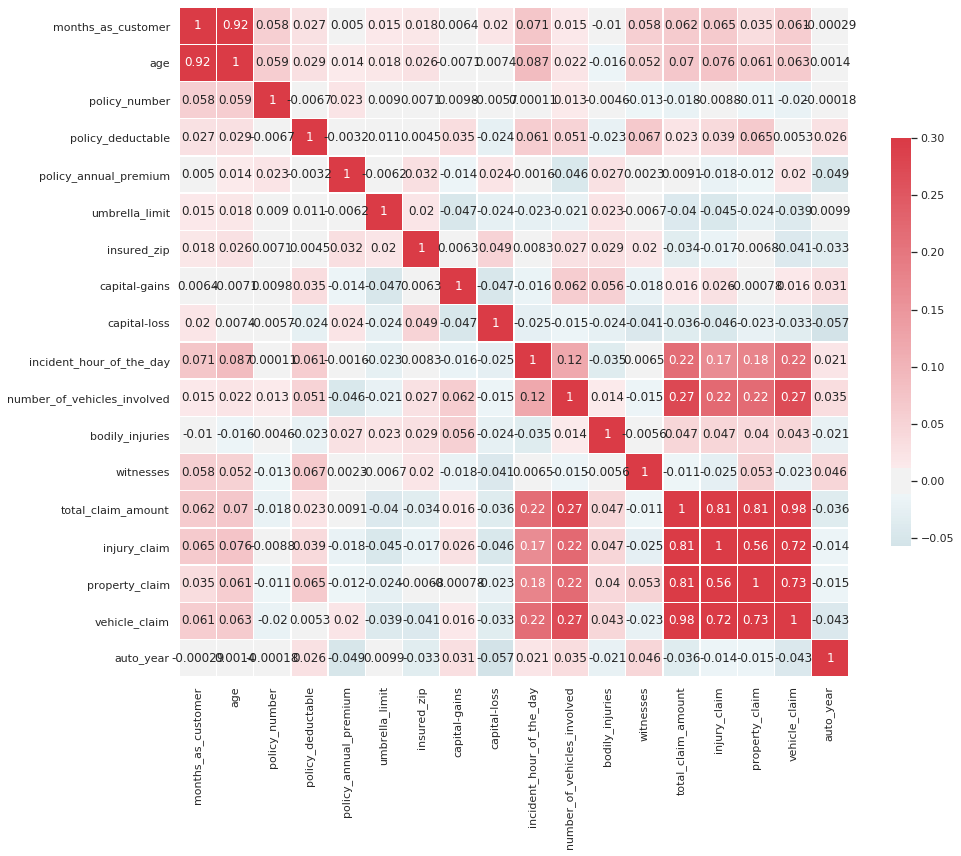

In [65]:
# Checking correlation among columns (correlation matrix)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation matrix gives us linear correlation among each predictors two at time. The indicator has values between ([-1,1]) that indicates a perfect direct/inverse linear correlation. <br>

If we have high correlation among predictors (Multicollinearity) the statistic model hase a penality (worst performance in our prediction) so we delete variable correlated except for one.

In our model we have total_claim_amount strong related to **injury_claim**, **property_claim** and **vehicle_claim** because total is the sum of the others. We can delete the last three variables.

We can also delete age (or months_as_customer). These two vars are strong related because an older insurer usually has a an insurance from more time.

In [74]:
#We delete columns according to correlation matrix
#data.drop(['injury_claim','property_claim','vehicle_claim','age'],axis=1,inplace=True) 

In [66]:
data.shape

(1000, 39)

In [67]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [68]:
#We examinate specific columns bause we want to delete them!!!
data.loc[:5,['policy_state','policy_csl','incident_state','incident_city','incident_date','incident_location']]
#These columns have no  insights that could be use for our predictive models.

,policy_state,policy_csl,incident_state,incident_city,incident_date,incident_location
0,OH,250/500,SC,Columbus,2015-01-25,9935 4th Drive
1,IN,250/500,VA,Riverwood,2015-01-21,6608 MLK Hwy
2,OH,100/300,NY,Columbus,2015-02-22,7121 Francis Lane
3,IL,250/500,OH,Arlington,2015-01-10,6956 Maple Drive
4,IL,500/1000,NY,Arlington,2015-02-17,3041 3rd Ave
5,OH,250/500,SC,Arlington,2015-01-02,8973 Washington St


In [69]:
#We delete them!!!
data.drop(['policy_state','policy_csl','incident_state','incident_city','incident_date','incident_location'],axis=1,inplace=True) 

In [70]:
#We convert our responce (the columns we want to predict, Fraud/not Fraud) from (Y,N) to (1,0)
data['fraud_reported'] = data['fraud_reported'].str.replace('Y', '1') #Y -->1
data['fraud_reported'] = data['fraud_reported'].str.replace('N', '0') #N -->0
data['fraud_reported'] = data['fraud_reported'].astype(int) #Convert to Integer type

In [71]:
data['fraud_reported'].unique()  #We have only to integer for our responce!!

array([1, 0])

### 2.4 Exploratory Data Analysis

We do EDA (plot data) to obtain some useful according to a specific qualitative var (predictor) on the x-axis we have a particular distribution of responce (Fraud/No Fraud) into specific classes.

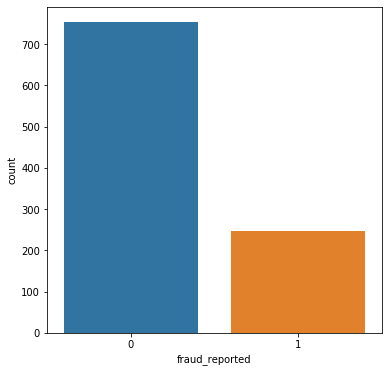

In [13]:
#We check if the Dataset is balanced or inbalanced
f, ax = plt.subplots(figsize=(6, 6)) #size of the plot
sns.countplot(x='fraud_reported',data=data)
#The dataset is inbalanced. The ratio of fraud/not fraud is about 25/75

In [21]:
#We will visualize the data and see if there is any feature which might inflence the claims

#We create a specific function to visualize data with different plots
def vis_data(df, x, y = 'fraud_reported', graph = 'countplot'):
    # Histogram plot
    if graph == 'hist':
        fig = px.histogram(df, x = x,width=500,height=500)
        fig.update_layout(title = 'Distribution of {x}'.format(x = x))
        fig.show()
    # Bar plot
    elif graph == 'bar':
      
      fig = px.bar(df, x = x, y = y,width=500,height=500)
      fig.update_layout(title = '{x} vs. {y}'.format(x = x, y = y))
      fig.show()
    elif graph == 'countplot':
      
      a = df.groupby([x,y]).count() #Groupwith a df with x,y as index and coutn (same) on all ohter columns
      a.reset_index(inplace = True) #Old 2 indexes of the df are added as first and second column and a progressive number replace the old index 
      no_fraud = a[a['fraud_reported'] == 0] #we take df only with no fraud
      yes_fraud = a[a['fraud_reported'] == 1] #we take df only with fraud
      trace1 = go.Bar(x = no_fraud[x], y = no_fraud['policy_deductable'], name = 'No Fraud')#plot the bar of sum for the column x of no fraud
      trace2 = go.Bar(x = yes_fraud[x], y = yes_fraud['policy_deductable'], name = 'Fraud') #plot the bar of the sum for the column x froud
      fig = go.Figure(data = [trace1, trace2])
      fig.update_layout(title = '{x} vs. {y}'.format(x=x, y = y),width=500,height=500)
      fig.update_layout(barmode = 'group')
      fig.show()


In [23]:
#insurex_sex vs fraud_reported
vis_data(data, "insured_sex")

In [24]:
#insured_education vs fraud_reported
vis_data(data,'insured_education_level')

In [26]:
#incident_relationship vs fraud_reported
vis_data(data,"insured_relationship")

In [27]:
#Insured occupation vs fraud reported
vis_data(data,"insured_occupation")

From data, it look like exec-managerial positions have more frouds compared to other occupations. Also tech-support, sales, craft-repair and machine-op commit higher fraud than average.

In [28]:
#Incident_type vs fraud report
vis_data(data,"incident_type")

Multi-vehicle and Single-vehicle collisions have more numre number of frauds, one of the reason could be that in collision there is a high possibility of more damage to car as well as the passengers.

In [29]:
#Collision_type vs fraud_reported
vis_data(data,"collision_type")

There is a significant numbers of false claims in front and side collisions, rear collisions are the highest.

In [30]:
#Incident_severity vs fraud reported
vis_data(data,"incident_severity")

Fraudulent claims are highest in major damage. One reason could be the high amount of repair cost which will be incurred by insurer due to major damage.

In [31]:
#authorities_contacted vs fraud_reported
vis_data(data,"authorities_contacted")

In [32]:
#Insured_hobbies vs fraud_reported
vis_data(data,"insured_hobbies")

People with chess and cross-fit as hobby have extremly high number of fraudolent claims. We will keep them and rename other values as "other".

If we have very rilevant insights (this situation) and qualitative predictors with many classes if we reduce the number of classes by keeping the useful informations we have better performance in our ML models.

In [33]:
hobbies = data["insured_hobbies"].unique()
for hobby in hobbies:
    if (hobby !="chess") & (hobby !="cross-fit"):
        data["insured_hobbies"] = data["insured_hobbies"].str.replace(hobby,"other")

data["insured_hobbies"].unique()

array(['other', 'chess', 'cross-fit'], dtype=object)

In [34]:
#Distribution of age
vis_data(data,'age','anything','hist')

In [72]:
data['age'].describe()

count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

From the **age** distribution we see a varied distribution. This hypothesis is also confirmed by high std deviation (9.14) with a range of values [(min max)] of [(19 64)].

So we create a qualitative variable from the Age discrete variable that could be useful to find the insights related to Fraud/not fraud responce.

Each bin in the previous distribution is a value of our new qualitative predictor.

In [83]:
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']

bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65] #The criteria for the bins (the bins intervals)

data['age_group'] = pd.cut(data['age'], bins = bins, labels = bin_labels, include_lowest = True) #lowest tells first interval should be left-inclusive (15)

In [84]:
#age_group vs fraud_reported
vis_data(data, "age_group")

People in age group 31-35 and 41-45 have more Fraud

In [37]:
#auto_make vs fraud_reported
vis_data(data, "auto_make")

In [39]:
#number_of_vehices_involved vs fraud_reported
vis_data(data,'number_of_vehicles_involved')

In [40]:
#witness vs frauded_reported
vis_data(data,'witnesses', 'fraud_reported')

In [41]:
#bodily_injuries vs fraud_reported
vis_data(data,"bodily_injuries")

In [42]:
#Distribution of total_claim_amount
vis_data(data,"total_claim_amount","y","hist")

In [43]:
#incident_hour vs fraud_reported
vis_data(data,"incident_hour_of_the_day")

In [44]:
#auto_year vs fraud_reported
vis_data(data, 'auto_year')

In [73]:
data['policy_annual_premium'].describe()

count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64

Interesting distribution--->we a qualitative predictor from a quantitavie predictor.

In [74]:
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

data['policy_annual_premium_groups'] = pd.cut(data['policy_annual_premium'], bins = bins, labels=bin_labels)

In [75]:
#policy_annual_premium_groups vs fraude reported
vis_data(data,"policy_annual_premium_groups")

In [76]:
data['policy_deductable'].describe()

count    1000.000000
mean     1136.000000
std       611.864673
min       500.000000
25%       500.000000
50%      1000.000000
75%      2000.000000
max      2000.000000
Name: policy_deductable, dtype: float64

In [77]:
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

data['policy_deductable_group'] = pd.cut(data['policy_deductable'], bins = bins, labels = bin_labels)

vis_data(data, 'policy_deductable_group')

In [78]:
#property_damage vs fraud_reported
vis_data(data, 'property_damage')

In [79]:
#police_report_available vs fraud_reported
vis_data(data, 'police_report_available')

In [80]:
#We remove columns for which we created groups
#data = data.drop(['age', 'policy_deductable', 'policy_annual_premium'], axis = 1)
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'policy_annual_premium_groups',
       'policy_deductable_group'],
      dtype='object')

Based on the EDA, we remove some of the columns. We remove columns where there isn't an insight (more Fraud for specific groups/qualitative predictors specific value)

In [81]:
required_columns = ['policy_number', 'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'witnesses', 'total_claim_amount',
    'fraud_reported', 'age_group', 'policy_annual_premium_groups','policy_deductable_group']

print(len(required_columns))

19


In [ ]:
#I want to select other columns second time!!!!

In [85]:
data1 = data[required_columns]
data1[:3]

,policy_number,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age_group,policy_annual_premium_groups,policy_deductable_group
0,521585,MALE,MD,craft-repair,sleeping,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,2,71610,1,46-50,medium,501-1000
1,342868,MALE,MD,machine-op-inspct,reading,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,0,5070,1,41-45,medium,1501-2000
2,687698,FEMALE,PhD,sales,board-games,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,3,34650,0,26-30,medium,1501-2000


### 2.3 Encoding data for modelling

In [86]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   policy_number                 1000 non-null   int64   
 1   insured_sex                   1000 non-null   object  
 2   insured_education_level       1000 non-null   object  
 3   insured_occupation            1000 non-null   object  
 4   insured_hobbies               1000 non-null   object  
 5   capital-gains                 1000 non-null   int64   
 6   capital-loss                  1000 non-null   int64   
 7   incident_type                 1000 non-null   object  
 8   collision_type                1000 non-null   object  
 9   incident_severity             1000 non-null   object  
 10  authorities_contacted         1000 non-null   object  
 11  incident_hour_of_the_day      1000 non-null   int64   
 12  number_of_vehicles_involved   1000 non-null   int

We need to trasform qualitative features to dummy variables for our predictive models.

To transform a qualitative variable to dummy var the type must be **object**. The qualitative variables that we create are **category** variable.

In [87]:
cat_cols = ['age_group', 'policy_annual_premium_groups', 'policy_deductable_group']
#We convert cat_cols to object
for col in cat_cols:
  data1[col] = data1[col].astype('object')
#We indentify the columns to transform to dummy variables (qualitative vars aka object vars)
columns_to_encode = []
for col in data1.columns:
  if data1[col].dtype == 'object':
    columns_to_encode.append(col)

columns_to_encode

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'age_group',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [88]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   policy_number                 1000 non-null   int64 
 1   insured_sex                   1000 non-null   object
 2   insured_education_level       1000 non-null   object
 3   insured_occupation            1000 non-null   object
 4   insured_hobbies               1000 non-null   object
 5   capital-gains                 1000 non-null   int64 
 6   capital-loss                  1000 non-null   int64 
 7   incident_type                 1000 non-null   object
 8   collision_type                1000 non-null   object
 9   incident_severity             1000 non-null   object
 10  authorities_contacted         1000 non-null   object
 11  incident_hour_of_the_day      1000 non-null   int64 
 12  number_of_vehicles_involved   1000 non-null   int64 
 13  witnesses          

In [89]:
data1.head(5)

,policy_number,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age_group,policy_annual_premium_groups,policy_deductable_group
0,521585,MALE,MD,craft-repair,sleeping,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,2,71610,1,46-50,medium,501-1000
1,342868,MALE,MD,machine-op-inspct,reading,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,0,5070,1,41-45,medium,1501-2000
2,687698,FEMALE,PhD,sales,board-games,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,3,34650,0,26-30,medium,1501-2000
3,227811,FEMALE,PhD,armed-forces,board-games,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,2,63400,1,41-45,medium,1501-2000
4,367455,MALE,Associate,sales,board-games,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,1,6500,0,41-45,high,501-1000


In [90]:
#We convert qualitative to dummy variables
df2 = pd.get_dummies(data1,columns = columns_to_encode)

df2.head()

,policy_number,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,age_group_56-60,age_group_61-65,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,521585,53300,0,5,1,2,71610,1,0,1,...,0,0,0,0,1,0,0,0,0,1
1,342868,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,687698,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,227811,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,1,0,0,0,1,0
4,367455,66000,-46000,20,1,1,6500,0,0,1,...,0,0,1,0,0,0,0,0,0,1


## 3 Predictive Models 

### 3.1 Features ,Target and Scaling

In [91]:
#Features and Target

#A list with all predictors
features = []
for col in df2.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

#We create a matrix with features and a matrix (1 column) for responce
#We need for the setting for ML models purpose (input vars)
X = df2[features]
y = df2[target]

In [92]:
X[:3]

,policy_number,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,...,age_group_56-60,age_group_61-65,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,521585,53300,0,5,1,2,71610,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,342868,0,0,8,1,0,5070,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,687698,35100,0,7,3,3,34650,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [93]:
#Scaling predictors (all!!! --> both quantitative and qualitative)
#We gives to all models the same distribution (predicting model purpose)
sc = StandardScaler()
X = sc.fit_transform(X)

In [94]:
X.shape #We have a matrix with same shape as before scaling!!

(1000, 85)

In [95]:
X[:1]

array([[-0.09595307,  1.01133064,  0.95385051, -0.95626066, -0.82386498,
         0.46183785,  0.71425742, -1.07695274,  1.07695274, -0.41181385,
        -0.37276288, -0.43643578, -0.43805834,  2.43812314, -0.40848641,
        -0.37796447, -0.26366402, -0.2722386 ,  3.53744449, -0.28679449,
        -0.23657178, -0.23891934, -0.32021217, -0.27645301, -0.27645301,
        -0.30478874, -0.25929878, -0.28679449, -0.29085855, -0.27854301,
        -0.22699055, -0.1876078 , -0.22454436, -0.24356115, -0.24124895,
        -0.21958604, -0.19044535, -0.21197188, -0.24585644, -0.24124895,
        -0.23420572, -0.23891934, -0.24124895, -0.24585644, -0.22207644,
        -0.26148818, -0.22699055,  4.83634613, -0.22941573, -0.23657178,
        -0.84921752, -0.30282513,  1.21712349, -0.32210675, -0.46534397,
        -0.58350885, -0.64220665,  1.61962601,  1.61962601, -0.74026186,
        -0.62360956, -0.31448545, -0.49374193, -0.53572501, -0.31640166,
        -0.49687301,  1.55713119, -0.04476615, -0.1

## 3.2 Modeling

In [96]:
# Splitting randomly in train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [97]:
#Logistic Regression
lr = LogisticRegression()

lr.fit(X_train, y_train)
preds_logi = lr.predict(X_test)

score = lr.score(X_test, y_test)
print(score)

0.852


In [99]:
#Other performance indicators: Precision-Recall, F1 score
print(classification_report(y_test, preds_logi))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       180
           1       0.80      0.63      0.70        70

    accuracy                           0.85       250
   macro avg       0.83      0.78      0.80       250
weighted avg       0.85      0.85      0.85       250



In [100]:
#Decision Tree

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
preds_dt = dtc.predict(X_test)
#Performance and other indicators
score = dtc.score(X_test, y_test)
print(score)
print()
print(classification_report(y_test, preds_dt))
#No improvement!!

0.856

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       180
           1       0.75      0.73      0.74        70

    accuracy                           0.86       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.85      0.86      0.86       250



In [101]:
#Random forest
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [102]:
preds_rf = rfc.predict(X_test)
#Perforance and other indicators
score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds_rf))
#Again no so muc improvement..

78.4

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       180
           1       0.70      0.40      0.51        70

    accuracy                           0.78       250
   macro avg       0.75      0.67      0.69       250
weighted avg       0.77      0.78      0.76       250



In [103]:
#Support Vector Machine
svc = SVC(kernel='linear',probability=True)
svc.fit(X_train, y_train)

preds_svm = svc.predict(X_test)

print('Score:' , svc.score(X_test, y_test))

Score: 0.884


In [104]:
print('Classification report:', classification_report(y_test, preds_svm))
#We have very good perfomance!!

Classification report:               precision    recall  f1-score   support

           0       0.94      0.89      0.92       180
           1       0.76      0.86      0.81        70

    accuracy                           0.88       250
   macro avg       0.85      0.88      0.86       250
weighted avg       0.89      0.88      0.89       250



3.3 ROC curve, P-R curve, Roc_Auc_score

In [105]:
#Logistic Regression
#Taking the positive probs
lr_probs = lr.predict_proba(X_test)
#Taking prob for positive outcome (Fraud)
lr_probs_pos = lr_probs[:,1]
#Decision Tree
dt_probs = dtc.predict_proba(X_test)
dt_probs_pos = dt_probs[:,1]
#Random Forest
rf_probs = rfc.predict_proba(X_test)
rf_probs_pos = rf_probs[:,1]
#Support Vector Machine
svm_probs = svc.predict_proba(X_test)
svm_probs_pos = svm_probs[:,1]

In [106]:
lr_probs[:10]  #Am a list ifo list. The inner list has [No fraud prob,Frau prob]

array([[0.88969744, 0.11030256],
       [0.9448468 , 0.0551532 ],
       [0.97385696, 0.02614304],
       [0.81431299, 0.18568701],
       [0.9785326 , 0.0214674 ],
       [0.21942672, 0.78057328],
       [0.64560519, 0.35439481],
       [0.99006678, 0.00993322],
       [0.74988495, 0.25011505],
       [0.94026565, 0.05973435]])

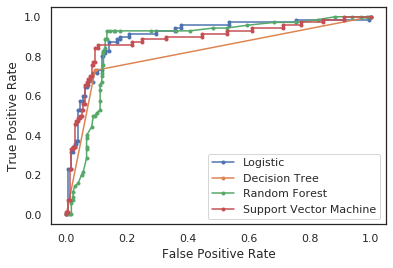

In [107]:
#Calculating the two axes values for  ROC curve (for each model)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs_pos)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs_pos)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs_pos)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs_pos)

# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

From the roc Curve SVM, Random Forest, and Logistic Regression are tree good choices, Decision Tree is the worst. This scenario can be confirmed by Roc_Auc_score, an indicator that summarizes the ROC curve.

ROC Curve (and AUC ROC index) gives useful information with balanced dataset (unfortunately our dataset is unbalanced!!)

In [108]:
#We calculate the ROC_auc for the 4 models
ls_auc = roc_auc_score(y_test, lr_probs_pos)
dt_auc = roc_auc_score(y_test,dt_probs_pos)
rf_auc = roc_auc_score(y_test,rf_probs_pos)
svm_auc = roc_auc_score(y_test,svm_probs_pos)
#We print the values
print("Logistic Regression AUC score {:.3f}".format(ls_auc))
print("Decision tree AUC score {:.3f}".format(dt_auc))
print("Random forest AUC score {:.3f}".format(rf_auc))
print("SVM AUC score {:.3f}".format(svm_auc))

Logistic Regression AUC score 0.903
Decision tree AUC score 0.817
Random forest AUC score 0.876
SVM AUC score 0.884


But the ROC curve and ROC AUC index overstimate the models performance when when we have an unbilanced dataset. We need to use Precision_Recall curve and P-R AUC index to identify the the actual performance on an inbilanced dataset (like our Auto Insurance Fraud dataset).

In [109]:
#We calculate the Precision and Recall values
#Logistic Regression
precision_logi, recall_logi, _ = precision_recall_curve(y_test, lr_probs_pos)
#Decision Tree
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_probs_pos)
#Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs_pos)
#Support Vector Machine
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_probs_pos)

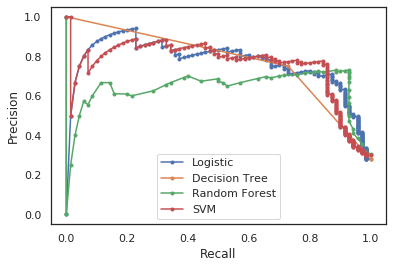

In [110]:
#Plotting P-R graphs 
# plot the model precision-recall curve
pyplot.plot(recall_logi, precision_logi, marker='.', label='Logistic')
pyplot.plot(recall_dt, precision_dt, marker='.', label='Decision Tree')
pyplot.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
pyplot.plot(recall_svm, precision_svm, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

From the Precision Recall plot we see Logistic Regression has the best performance, followed by SVM, Decision Tree and Random Forest. We can also check this scenario from P-R AUC.

Remember that the P-R plot (and P-R AUC) are useful to set optimal parameter (probability Threshold) for best performance by minimizing error 1 (FN) and error 2 (FP).



In [111]:
#P-R AUC for the models:
AUC_logi = auc(recall_logi, precision_logi)
AUC_dt = auc(recall_dt, precision_dt)
AUC_rf = auc(recall_rf, precision_rf)
AUC_svm = auc(recall_svm, precision_svm)

#We print the Indexes
print("Logistic Regression P-R AUC score {:.3f}".format(AUC_logi))
print("Decision Tree P-R AUC score {:.3f}".format(AUC_dt))
print("Random forest P-R AUC score {:.3f}".format(AUC_rf))
print("SVM P-R AUC score {:.3f}".format(AUC_svm))

Logistic Regression P-R AUC score 0.762
Decision Tree P-R AUC score 0.777
Random forest P-R AUC score 0.632
SVM P-R AUC score 0.756


In [112]:
#Confusion Matrix for the models
cm_logi = confusion_matrix(y_test,preds_logi)
cm_dt = confusion_matrix(y_test,preds_dt)
cm_rf = confusion_matrix(y_test,preds_rf)
cm_svm = confusion_matrix(y_test,preds_svm)

In [113]:
#Plotting the Confusion Matrixes
#Remember!!! |TN FN|
#            |FP TP|
cm_logi

array([[169,  11],
       [ 26,  44]])

In [114]:
cm_dt

array([[163,  17],
       [ 19,  51]])

In [115]:
cm_rf

array([[168,  12],
       [ 42,  28]])

In [116]:
cm_svm

array([[161,  19],
       [ 10,  60]])

The insurance firm want to minimize the type 1 error (FN) because if we don't recognize an insurer that fraud, we lost money. FP is less important, we expect a cost that we will not have in the future.

Like from P-R AUC index the logistic regression has the best performance (lowest FN). From the confusion matrix we see that Random Forest is second best, followed by Decision Tree and SVM. 

## 4 Conclusion

The process to predict a binary responce in a inbalanced scenario (like the Auto Insurance Fraud) is not linear: 

- We need to join data from different origins and clean them heavily (not      our  scenario fortunately).<br>
- Manage null values, select right columns according to the insights, setup 
  the data for the predictive models (dummy variables, standardization, 
  convert qualitative variables in the right way).
- Choose the right performance metric. For unbalanced dataset  
  Precision-Recall plot and P-R AUC index is a good solution. With this 
  metrics Logistic Regression gives a good estimation (AUC :0.762), followed   by SVM and Decision Tree. But the purpose of P-R plot is to fit the in the   right way the probability threshold to minimize FN and FP. If we want to   
  check the model accoding to the kind of error, Confusion Matrix is a good  
  solution. Here Logistic regression is the best model (FN/TOTAL 11/250)  
  followed by Random Forest and Decision Tree. SVM is the worst   
  method (but better for lowest FP. FP/TOTAL 10/250).

We can improve our performance with other techniques: (not in this notebook!!)
- Parameters tuning. If we Know a model/s very well, we can setup the 
  Hyperparameters to find the best performance.
- With Inbalanced dataset we can use a special method: SMOTE
- We can use a tool to find the best parameters automatically (GridSearch)
- We can use more sophisticated method: Neural Network) ,Bayes theory models   (LDA ,QDA),...

